# Agent 1 — Event-to-Action Recognition (OpenTheChests)

##### **Authors**: François-Xavier Morel - Mathieu Delarue - Laury Magne - Robin Guiavarch


#### **Summary**

Welcome to the notebook dedicated to **Agent 1: Event-to-Action Recognition** using the *OpenTheChests* environment.  
This notebook explores three progressively complex approaches to mapping event sequences to actions using reinforcement learning.


#### 📚 **Table of Contents**

🔹 **1. Simple Approach: One-to-One Event Mapping**
- [1.1. Event Visualization](#11-event-visualization)
- [1.2. Model Training](#12-model-training)
  - [1.2.1. PPO](#121-ppo)
  - [1.2.2. DQN](#122-dqn)
- [1.3. Learning Curves](#13-learning-curves)
  - [1.3.1. PPO](#131-ppo)
  - [1.3.2. DQN](#132-dqn)
- [1.4. Model Evaluation](#14-model-evaluation)
  - [1.4.1. PPO](#141-ppo)
  - [1.4.2. DQN](#142-dqn)

🔹 **2. Intermediate Approach: Temporal Window**
- [2.1. Event Visualization](#21-event-visualization)
- [2.2. Model Training](#22-model-training)
- [2.3. Learning Curves](#23-learning-curves)
- [2.4. Model Evaluation](#24-model-evaluation)


🔹 **3. Advanced Approach: Sequence Modeling**
- [3.1. Event Visualization](#31-event-visualization)
- [3.2. Model Training](#32-model-training)
- [3.3. Learning Curves](#33-learning-curves)
- [3.4. Model Evaluation](#34-model-evaluation)

#### 🧾 Project Overview

This notebook is part of the project **"Reinforcement Learning for Robotic Task Recognition in Event-Driven Environments"**.  
It focuses on **Agent 1**, whose goal is to learn how to recognize meaningful patterns in a stream of symbolic events and decide which chest to open in the environment called **OpenTheChests**.

#### 🎯 Objective

Agent 1 must learn to:
- Observe a continuous stream of symbolic events (e.g., A, B, C...)
- Recognize valid event patterns (with or without noise)
- Map those patterns to the correct action (i.e., open the right chest)

The agent is trained using **Reinforcement Learning (RL)**, with several architectures and levels of complexity explored in this notebook:
1. **Simple Mapping** (Single event → Action)
2. **Temporal Window** (Short sequences of events)
3. **Advanced Sequence Modeling** (LSTM, Transformer)

#### 🧪 Environments & Tools

The experiments rely on:
- Custom Gym environments (`OpenTheChests-v0`, `v1`, `v2`)
- Event visualization with Matplotlib
- Training configuration through `.yaml` files
- Evaluation metrics: **average reward**, **success rate**, **learning curves**


📌 Follow the notebook sections in order to visualize events, train, and evaluate the models step by step.


In [1]:
# ✅ Patch for numpy.bool8 removal in NumPy >= 1.24
import numpy as np
if not hasattr(np, "bool8"):
    np.bool8 = np.bool_

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")  # <- si ton notebook est dans `notebooks/`, sinon adapte
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

print("✅ PROJECT_ROOT added to PYTHONPATH:", PROJECT_ROOT)


✅ PROJECT_ROOT added to PYTHONPATH: /Users/robinguiavarch/Documents/git_projects/robot_task_recognition_rl


## 1. Simple Approach: One-to-One Event Mapping




### 1.1. Event Visualization



In [8]:
from agent1_patterns_chests_to_reach.env.register_envs import register_custom_envs

register_custom_envs()


In [9]:
import gym
print("✅ Is OpenTheChests-v0 registered?", "OpenTheChests-v0" in gym.envs.registry)

✅ Is OpenTheChests-v0 registered? True


/Users/robinguiavarch/Library/Caches/pypoetry/virtualenvs/robot-task-recognition-rl-5EzxE_ra-py3.13/lib/python3.13/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


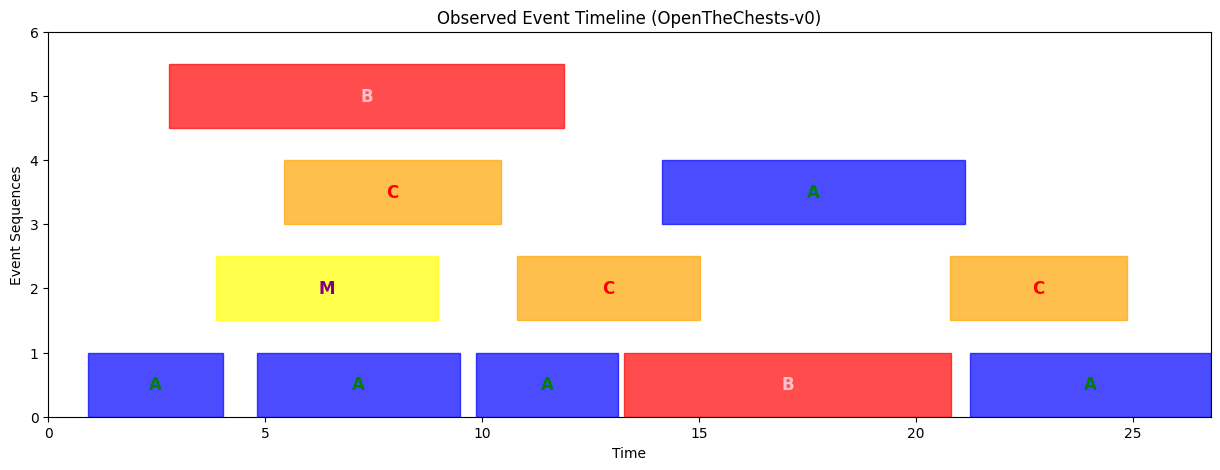

In [10]:
from agent1_patterns_chests_to_reach.utils.visualization import visualize_env_timeline

visualize_env_timeline("OpenTheChests-v0", num_steps=10)


### 1.2. Actor-Critic




Training with gamma: 0.99


/Users/robinguiavarch/Library/Caches/pypoetry/virtualenvs/robot-task-recognition-rl-5EzxE_ra-py3.13/lib/python3.13/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


[Ep 0] Actor Loss: -19.3615, Critic Loss: 113.1895, Total Reward: -18.00, Success: 0.0%
[Ep 50] Actor Loss: -2.0525, Critic Loss: 3.1798, Total Reward: -3.00, Success: 0.0%
[Ep 100] Actor Loss: -9.9851, Critic Loss: 45.9823, Total Reward: -15.00, Success: 0.0%
[Ep 150] Actor Loss: 5.2330, Critic Loss: 7.7177, Total Reward: -1.00, Success: 0.0%
[Ep 200] Actor Loss: 3.0314, Critic Loss: 2.1655, Total Reward: -1.00, Success: 0.0%
[Ep 250] Actor Loss: 2.1144, Critic Loss: 1.8668, Total Reward: -3.00, Success: 0.0%
[Ep 300] Actor Loss: 2.2014, Critic Loss: 1.1836, Total Reward: -2.00, Success: 0.0%
[Ep 350] Actor Loss: 8.3756, Critic Loss: 19.6751, Total Reward: 0.00, Success: 0.0%
[Ep 400] Actor Loss: -0.7766, Critic Loss: 7.3526, Total Reward: -7.00, Success: 0.0%
[Ep 450] Actor Loss: -13.9188, Critic Loss: 87.1230, Total Reward: -21.00, Success: 0.0%
[Ep 500] Actor Loss: 1.9980, Critic Loss: 1.6575, Total Reward: -3.00, Success: 0.0%
[Ep 550] Actor Loss: 0.7269, Critic Loss: 1.3089, Tota

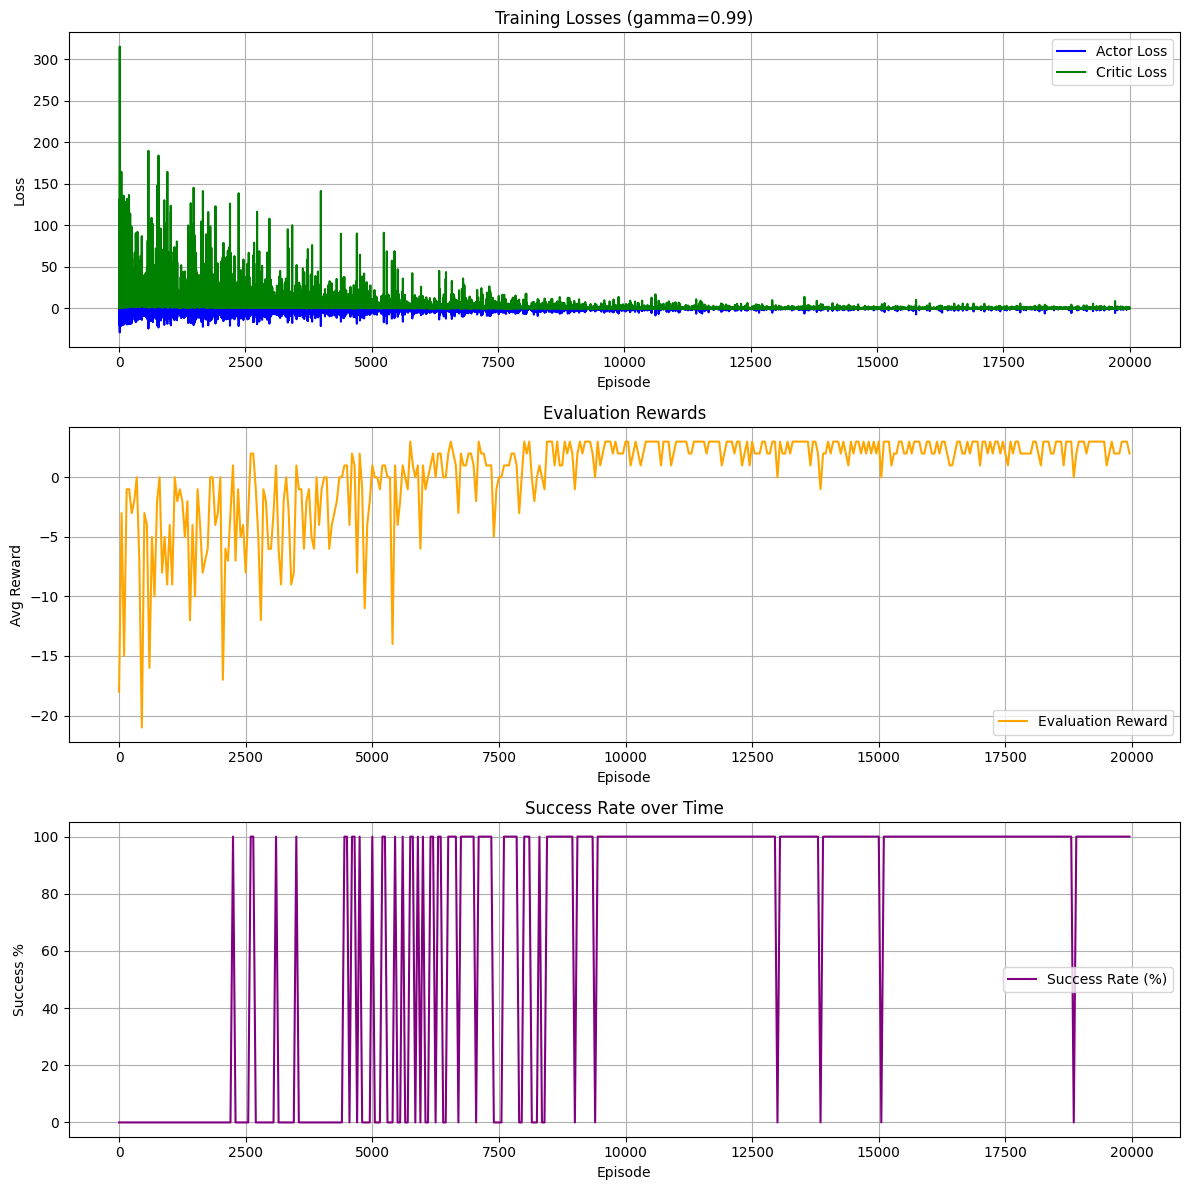

Training with gamma: 0.9
[Ep 0] Actor Loss: -2.0136, Critic Loss: 1.4595, Total Reward: -1.00, Success: 0.0%
[Ep 50] Actor Loss: -9.2636, Critic Loss: 25.3031, Total Reward: -12.00, Success: 0.0%
[Ep 100] Actor Loss: 0.0729, Critic Loss: 1.2299, Total Reward: -3.00, Success: 0.0%
[Ep 150] Actor Loss: -11.1805, Critic Loss: 41.6555, Total Reward: -20.00, Success: 0.0%
[Ep 200] Actor Loss: -6.7300, Critic Loss: 16.1871, Total Reward: -12.00, Success: 0.0%
[Ep 250] Actor Loss: -3.1533, Critic Loss: 7.5297, Total Reward: -8.00, Success: 0.0%
[Ep 300] Actor Loss: -1.8271, Critic Loss: 3.8865, Total Reward: -6.00, Success: 0.0%
[Ep 350] Actor Loss: 3.6713, Critic Loss: 5.6885, Total Reward: -4.00, Success: 0.0%
[Ep 400] Actor Loss: 5.8902, Critic Loss: 8.4049, Total Reward: -1.00, Success: 0.0%
[Ep 450] Actor Loss: 4.2494, Critic Loss: 5.8506, Total Reward: -2.00, Success: 0.0%
[Ep 500] Actor Loss: 7.1665, Critic Loss: 14.5382, Total Reward: 2.00, Success: 100.0%
[Ep 550] Actor Loss: -5.5656

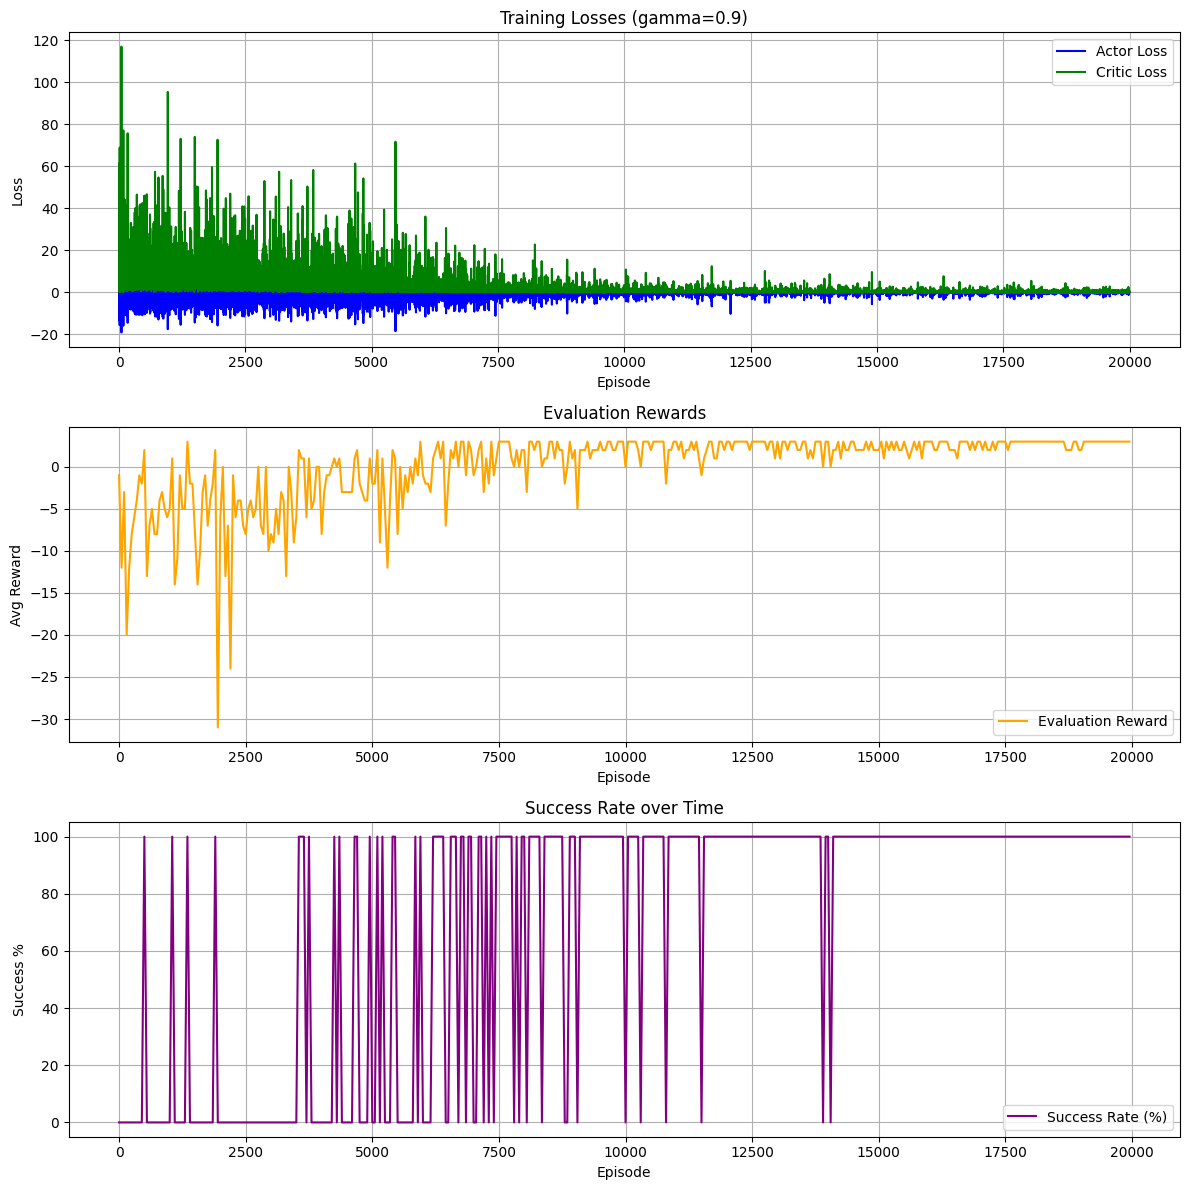

Training with gamma: 0.5
[Ep 0] Actor Loss: -4.7026, Critic Loss: 6.4599, Total Reward: -12.00, Success: 0.0%
[Ep 50] Actor Loss: -2.2562, Critic Loss: 3.8193, Total Reward: -10.00, Success: 0.0%
[Ep 100] Actor Loss: -1.6663, Critic Loss: 1.7298, Total Reward: -8.00, Success: 0.0%
[Ep 150] Actor Loss: -1.5215, Critic Loss: 1.7101, Total Reward: -9.00, Success: 0.0%
[Ep 200] Actor Loss: -2.8457, Critic Loss: 3.8478, Total Reward: -17.00, Success: 0.0%
[Ep 250] Actor Loss: -1.8184, Critic Loss: 3.8703, Total Reward: -18.00, Success: 0.0%
[Ep 300] Actor Loss: 0.5506, Critic Loss: 0.8676, Total Reward: -7.00, Success: 0.0%
[Ep 350] Actor Loss: 1.4517, Critic Loss: 1.3376, Total Reward: -3.00, Success: 0.0%
[Ep 400] Actor Loss: -0.0816, Critic Loss: 2.0766, Total Reward: -5.00, Success: 0.0%
[Ep 450] Actor Loss: -0.0710, Critic Loss: 2.1970, Total Reward: -8.00, Success: 0.0%
[Ep 500] Actor Loss: -1.5618, Critic Loss: 1.8296, Total Reward: -13.00, Success: 0.0%
[Ep 550] Actor Loss: -0.5017,

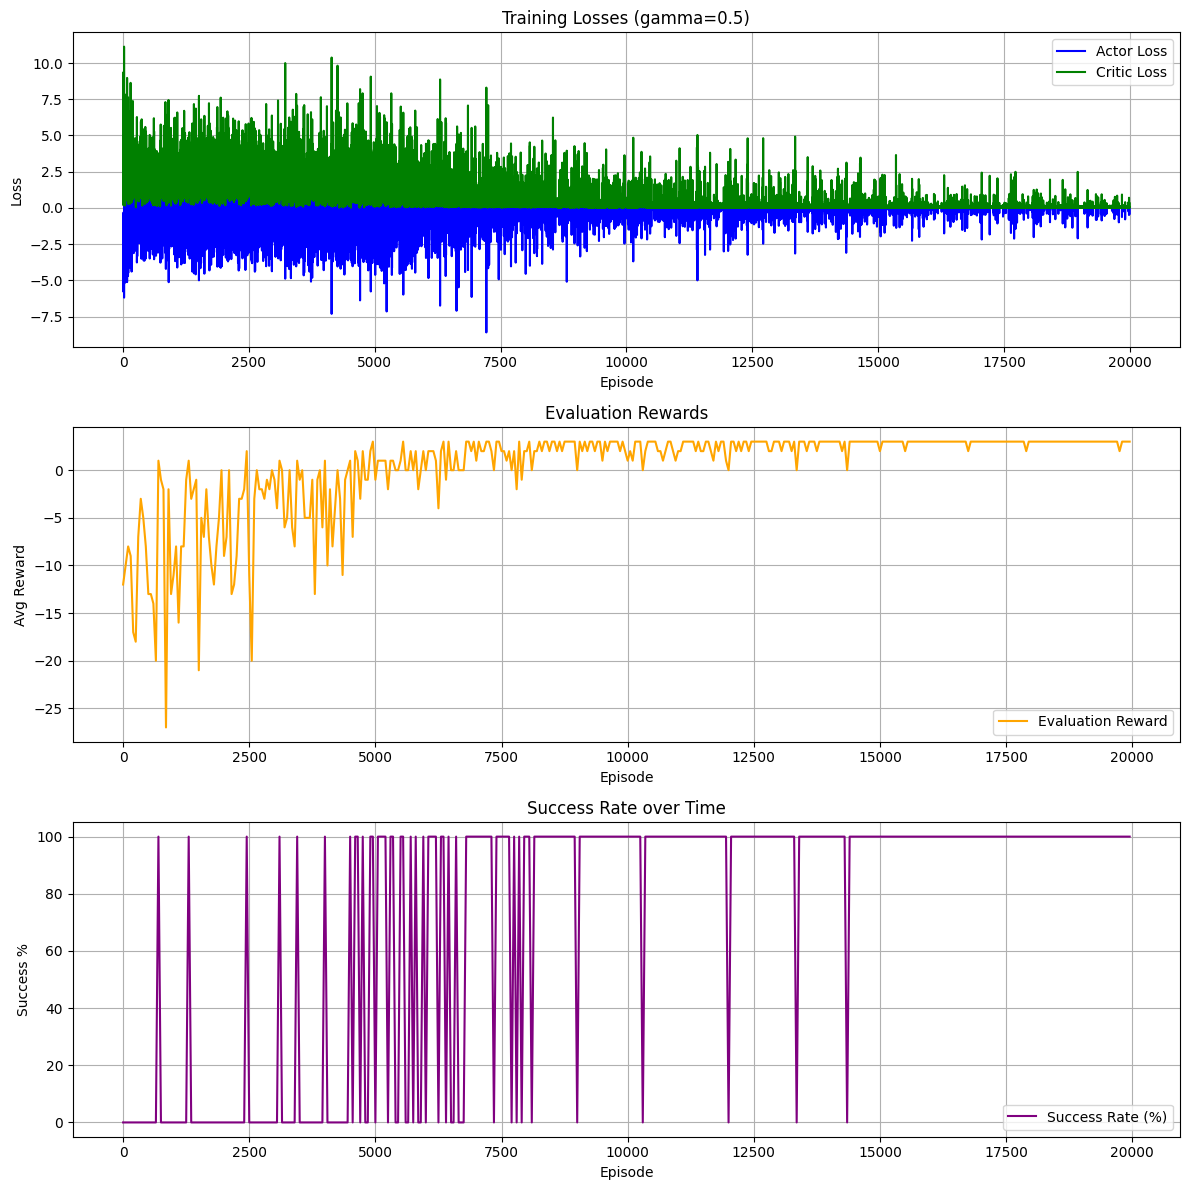

Training with gamma: 0.1
[Ep 0] Actor Loss: -0.8717, Critic Loss: 0.7669, Total Reward: -3.00, Success: 0.0%
[Ep 50] Actor Loss: 0.4282, Critic Loss: 2.0820, Total Reward: -2.00, Success: 0.0%
[Ep 100] Actor Loss: -0.6095, Critic Loss: 2.4861, Total Reward: -6.00, Success: 0.0%
[Ep 150] Actor Loss: 1.0659, Critic Loss: 2.0050, Total Reward: -2.00, Success: 0.0%
[Ep 200] Actor Loss: -0.6269, Critic Loss: 0.5214, Total Reward: -11.00, Success: 0.0%
[Ep 250] Actor Loss: -0.9905, Critic Loss: 1.6236, Total Reward: -10.00, Success: 0.0%
[Ep 300] Actor Loss: -0.7975, Critic Loss: 0.9221, Total Reward: -10.00, Success: 0.0%
[Ep 350] Actor Loss: 0.3539, Critic Loss: 1.3721, Total Reward: -5.00, Success: 0.0%
[Ep 400] Actor Loss: 0.4937, Critic Loss: 3.1099, Total Reward: -4.00, Success: 0.0%
[Ep 450] Actor Loss: -0.3548, Critic Loss: 1.1165, Total Reward: -7.00, Success: 0.0%
[Ep 500] Actor Loss: 0.5673, Critic Loss: 1.5845, Total Reward: -6.00, Success: 0.0%
[Ep 550] Actor Loss: -0.7989, Crit

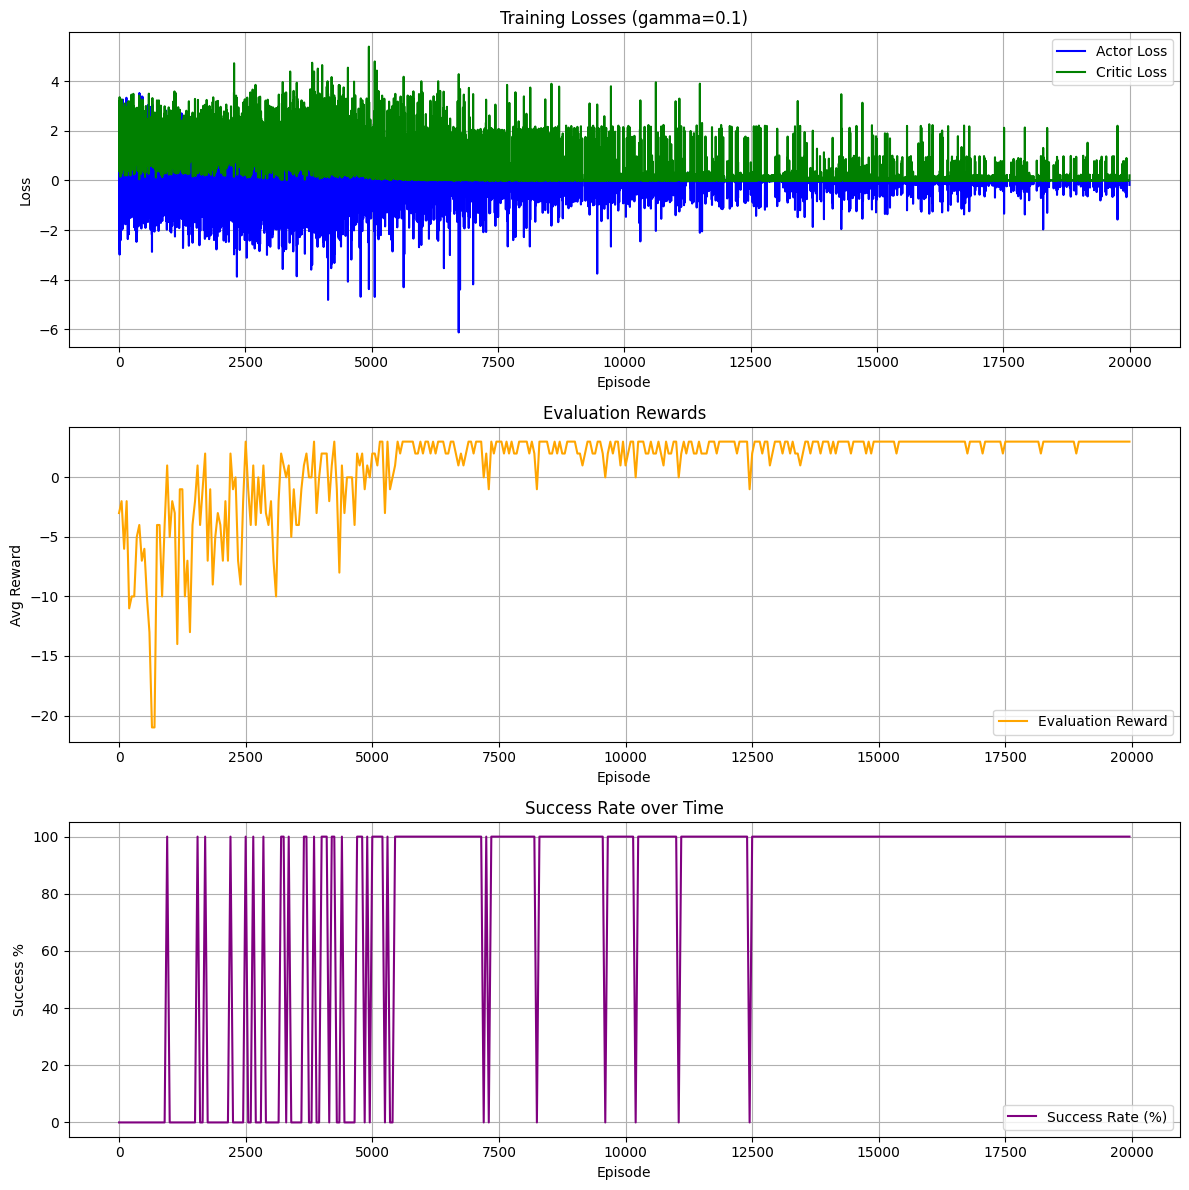

In [ ]:
from agent1_patterns_chests_to_reach.approach1_simple_event_mapping.training.train_actor_critic import train_actor_critic
from agent1_patterns_chests_to_reach.approach1_simple_event_mapping.plot_results.plot_results_actor_critic import plot_learning_curves
import torch


# Paramètres d'entraînement
env_name = "OpenTheChests-v0"
episodes = 20000
eval_interval = 50
eval_episodes = 100
gammas = [0.99, 0.9, 0.5,0.1]
lr_actor = 1e-4
lr_critic = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"

for gamma in gammas:
    print(f"Training with gamma: {gamma}")
    actor_losses, critic_losses, eval_rewards, success_rates = train_actor_critic(
        env_name=env_name,
        episodes=episodes,
        gamma=gamma,
        eval_interval=eval_interval,
        eval_episodes=eval_episodes,
        lr_actor=lr_actor,
        lr_critic=lr_critic,
        device=device
    )

    plot_learning_curves(
        actor_losses=actor_losses,
        critic_losses=critic_losses,
        eval_rewards=eval_rewards,
        success_rates=success_rates,
        eval_interval=eval_interval,
        gamma=gamma,
    )


#### 1.3. DQN



Training with gamma: 0.99
[Gamma 0.99] Episode 0 - AvgReward: -101.74, Success: 0.0%
[Gamma 0.99] Episode 50 - AvgReward: -102.02, Success: 0.0%
[Gamma 0.99] Episode 100 - AvgReward: -102.64, Success: 0.0%
[Gamma 0.99] Episode 150 - AvgReward: -43.46, Success: 0.0%
[Gamma 0.99] Episode 200 - AvgReward: 1.47, Success: 90.0%
[Gamma 0.99] Episode 250 - AvgReward: 1.56, Success: 91.0%
[Gamma 0.99] Episode 300 - AvgReward: 1.56, Success: 95.0%
[Gamma 0.99] Episode 350 - AvgReward: 1.51, Success: 94.0%
[Gamma 0.99] Episode 400 - AvgReward: 2.51, Success: 100.0%
[Gamma 0.99] Episode 450 - AvgReward: 2.45, Success: 99.0%
[Gamma 0.99] Episode 500 - AvgReward: 2.55, Success: 100.0%
[Gamma 0.99] Episode 550 - AvgReward: 2.43, Success: 99.0%
[Gamma 0.99] Episode 600 - AvgReward: 2.57, Success: 99.0%
[Gamma 0.99] Episode 650 - AvgReward: 2.53, Success: 99.0%
[Gamma 0.99] Episode 700 - AvgReward: 2.59, Success: 100.0%
[Gamma 0.99] Episode 750 - AvgReward: 2.54, Success: 100.0%
[Gamma 0.99] Episode 8

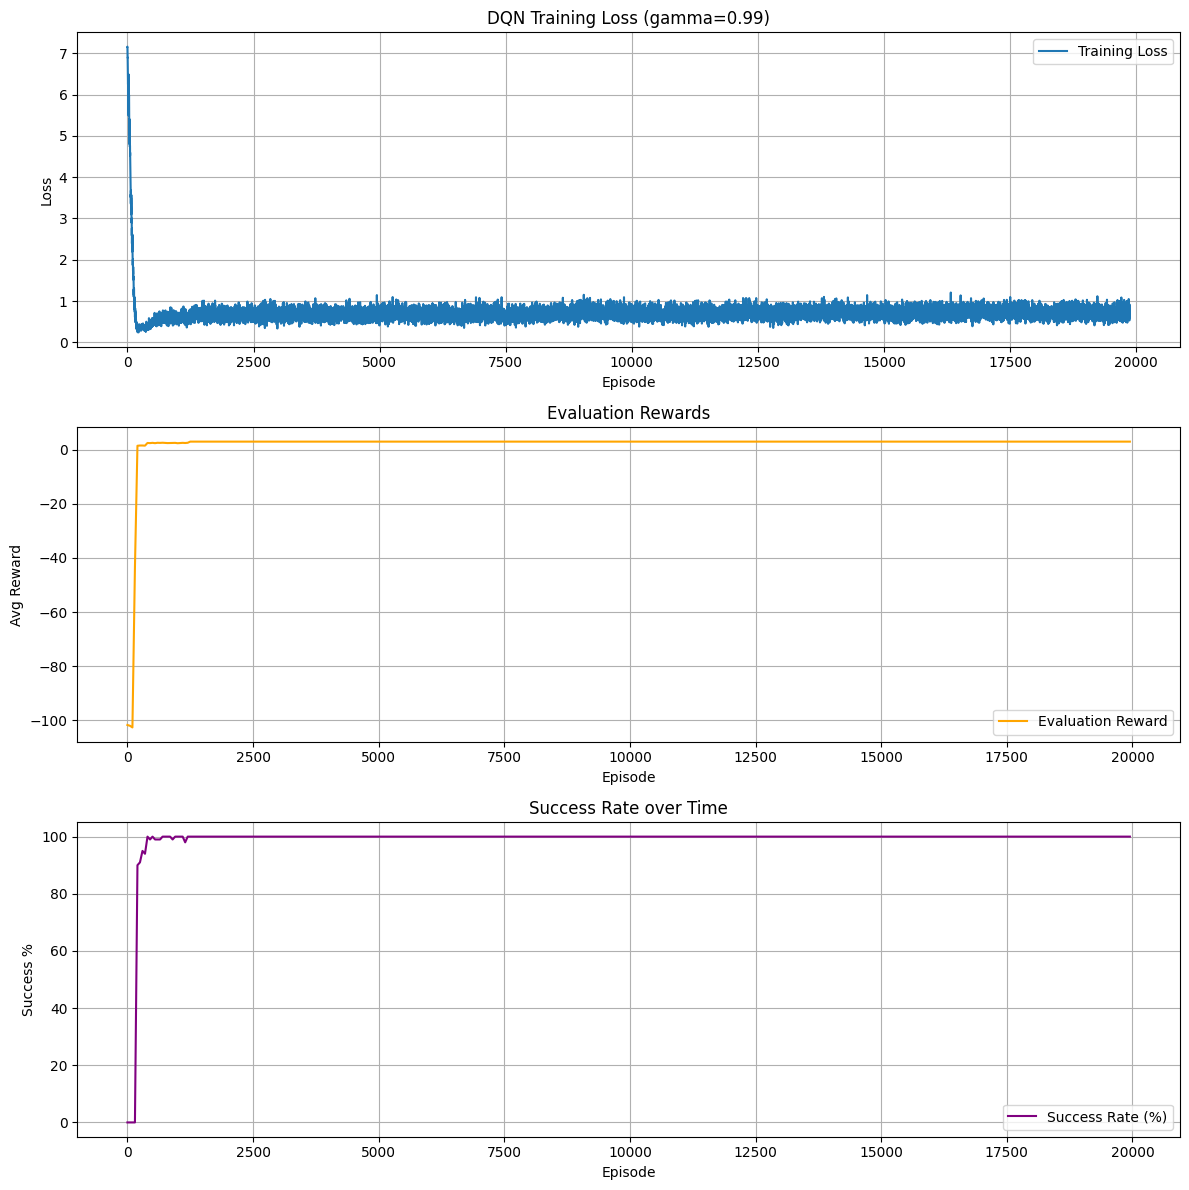

Training with gamma: 0.9
[Gamma 0.9] Episode 0 - AvgReward: -103.00, Success: 0.0%
[Gamma 0.9] Episode 50 - AvgReward: -103.24, Success: 0.0%
[Gamma 0.9] Episode 100 - AvgReward: -103.34, Success: 0.0%
[Gamma 0.9] Episode 150 - AvgReward: -63.55, Success: 0.0%
[Gamma 0.9] Episode 200 - AvgReward: 0.61, Success: 64.0%
[Gamma 0.9] Episode 250 - AvgReward: 1.45, Success: 94.0%
[Gamma 0.9] Episode 300 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.9] Episode 350 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.9] Episode 400 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.9] Episode 450 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.9] Episode 500 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.9] Episode 550 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.9] Episode 600 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.9] Episode 650 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.9] Episode 700 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.9] Episode 750 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.9] Episode 800 - AvgRewa

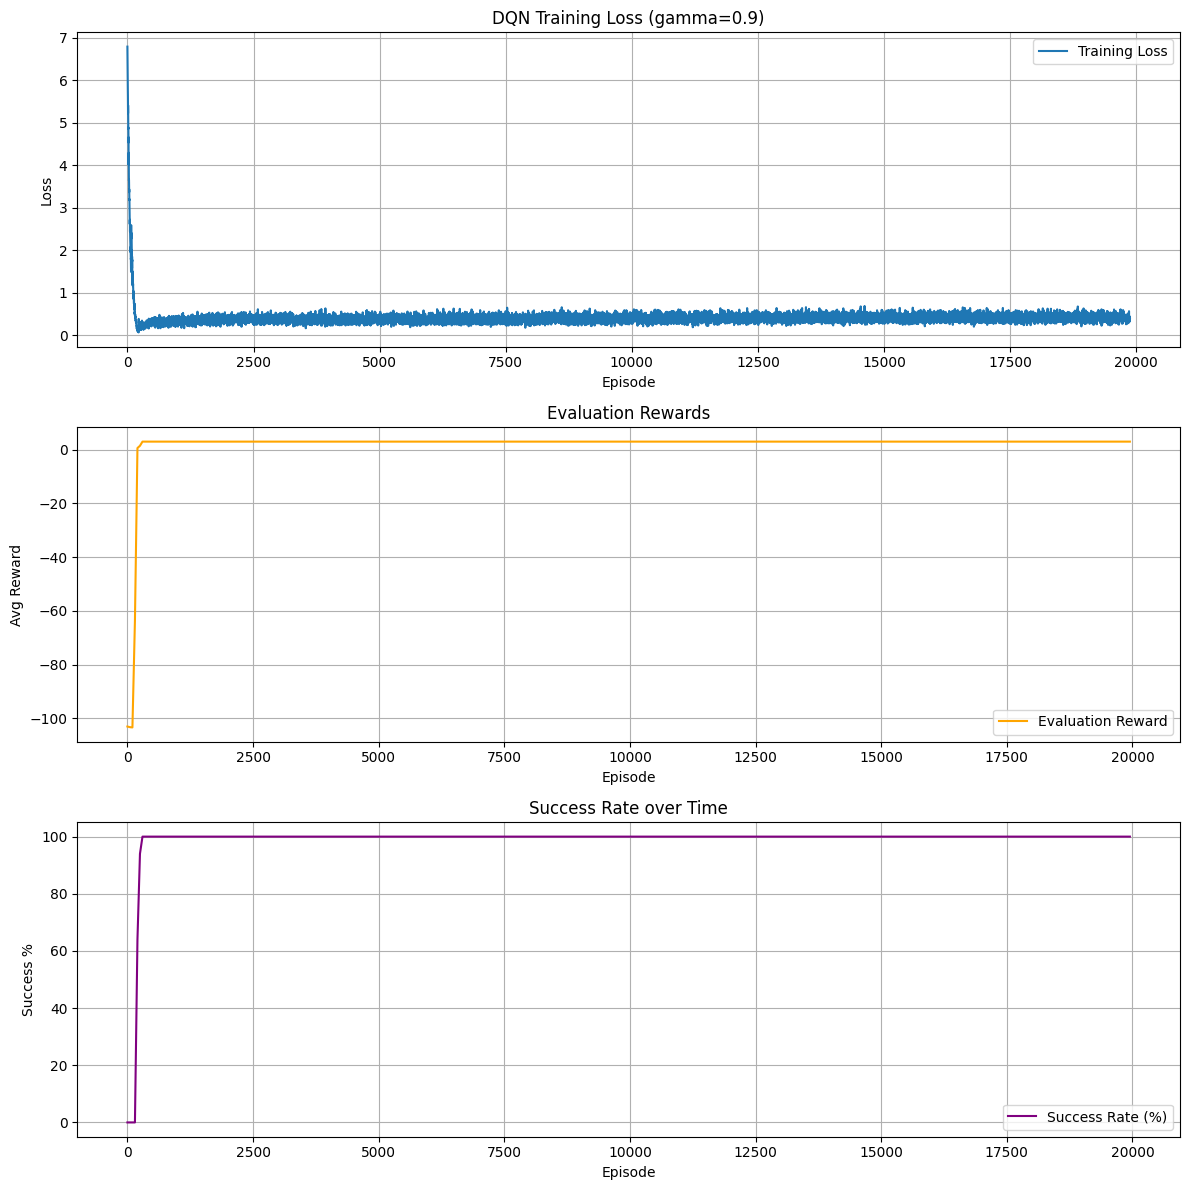

Training with gamma: 0.5
[Gamma 0.5] Episode 0 - AvgReward: -57.25, Success: 0.0%
[Gamma 0.5] Episode 50 - AvgReward: -58.28, Success: 0.0%
[Gamma 0.5] Episode 100 - AvgReward: -57.87, Success: 0.0%
[Gamma 0.5] Episode 150 - AvgReward: 0.06, Success: 58.0%
[Gamma 0.5] Episode 200 - AvgReward: 0.52, Success: 61.0%
[Gamma 0.5] Episode 250 - AvgReward: 0.54, Success: 59.0%
[Gamma 0.5] Episode 300 - AvgReward: 0.40, Success: 52.0%
[Gamma 0.5] Episode 350 - AvgReward: 0.51, Success: 59.0%
[Gamma 0.5] Episode 400 - AvgReward: 0.40, Success: 50.0%
[Gamma 0.5] Episode 450 - AvgReward: 1.00, Success: 100.0%
[Gamma 0.5] Episode 500 - AvgReward: 1.00, Success: 100.0%
[Gamma 0.5] Episode 550 - AvgReward: 1.00, Success: 100.0%
[Gamma 0.5] Episode 600 - AvgReward: 1.00, Success: 100.0%
[Gamma 0.5] Episode 650 - AvgReward: 2.00, Success: 100.0%
[Gamma 0.5] Episode 700 - AvgReward: 2.00, Success: 100.0%
[Gamma 0.5] Episode 750 - AvgReward: 2.00, Success: 100.0%
[Gamma 0.5] Episode 800 - AvgReward: 2.0

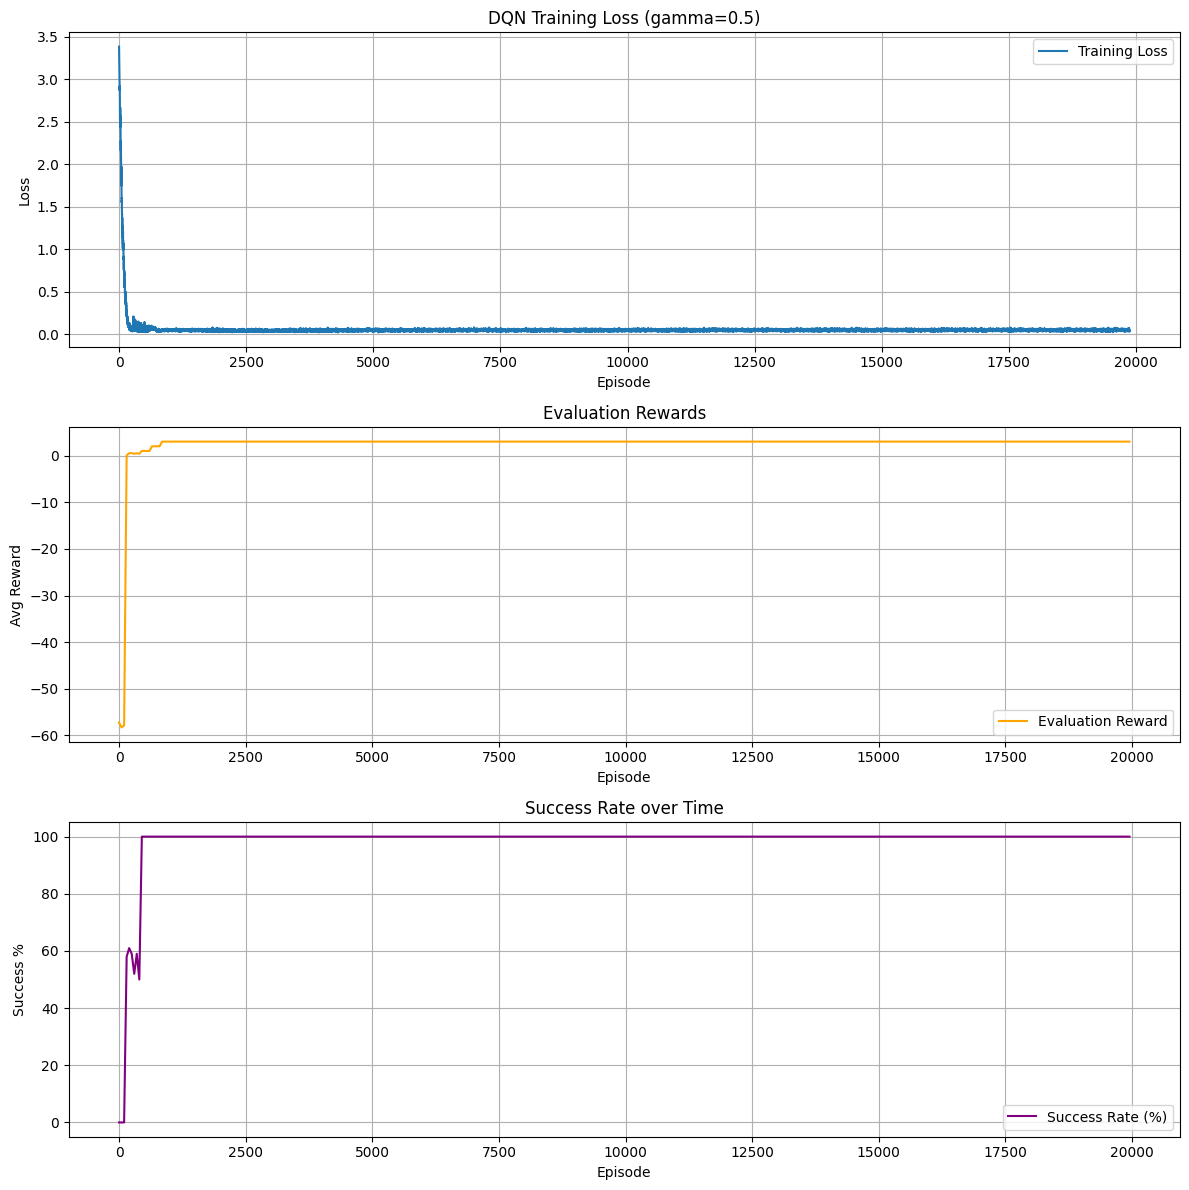

Training with gamma: 0.1
[Gamma 0.1] Episode 0 - AvgReward: -29.00, Success: 0.0%
[Gamma 0.1] Episode 50 - AvgReward: -29.00, Success: 0.0%
[Gamma 0.1] Episode 100 - AvgReward: -29.00, Success: 0.0%
[Gamma 0.1] Episode 150 - AvgReward: -62.83, Success: 0.0%
[Gamma 0.1] Episode 200 - AvgReward: 1.92, Success: 88.0%
[Gamma 0.1] Episode 250 - AvgReward: 2.59, Success: 99.0%
[Gamma 0.1] Episode 300 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.1] Episode 350 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.1] Episode 400 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.1] Episode 450 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.1] Episode 500 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.1] Episode 550 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.1] Episode 600 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.1] Episode 650 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.1] Episode 700 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.1] Episode 750 - AvgReward: 3.00, Success: 100.0%
[Gamma 0.1] Episode 800 - AvgReward:

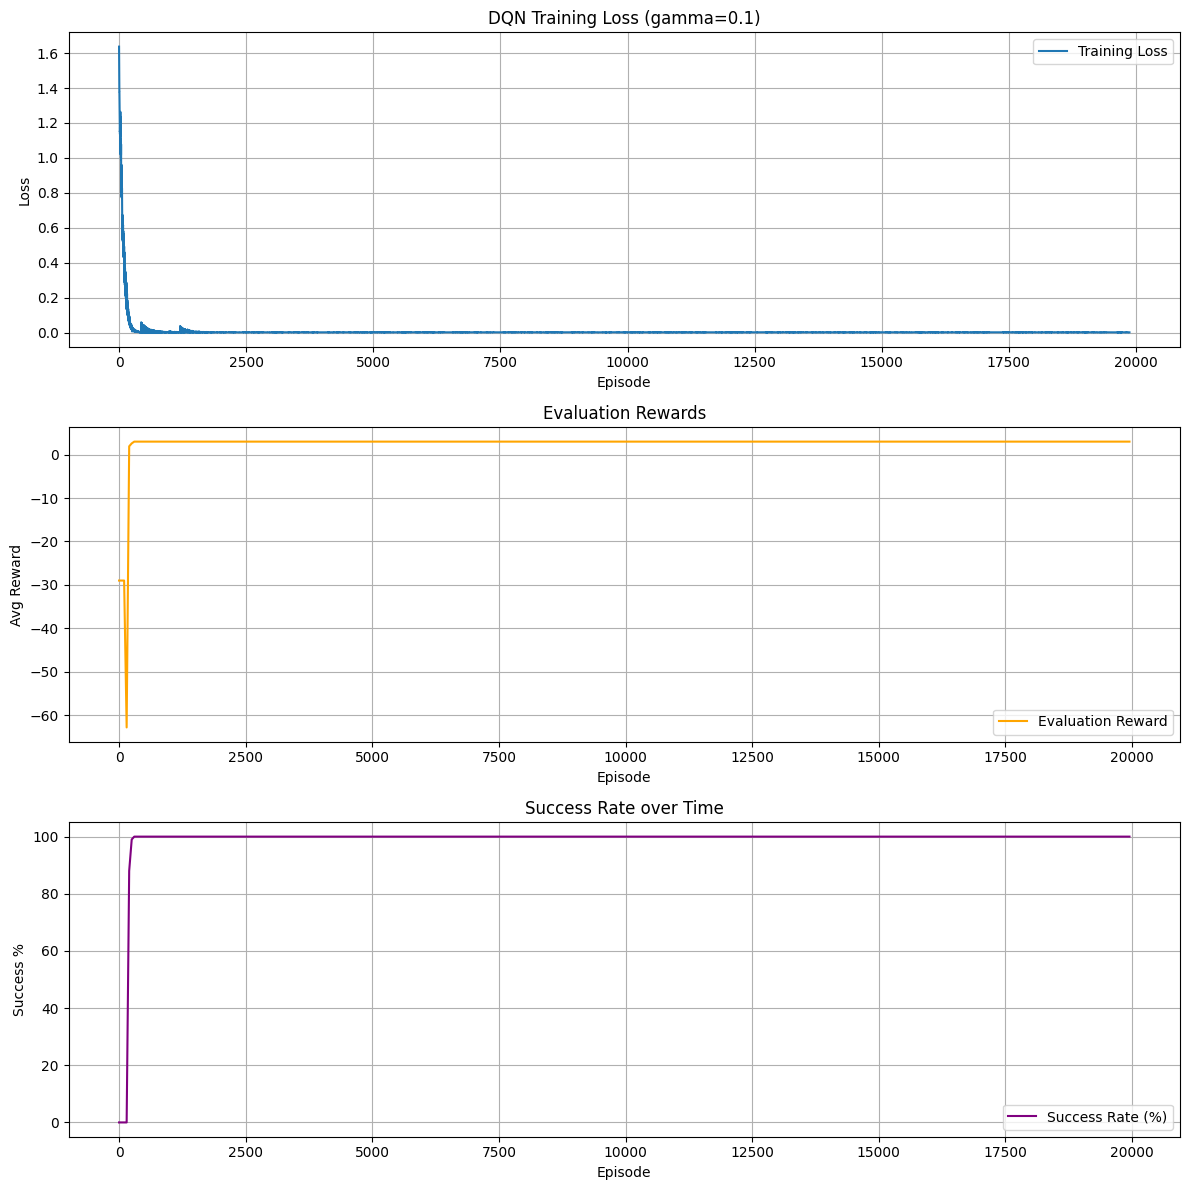

In [8]:
import torch
from agent1_patterns_chests_to_reach.approach1_simple_event_mapping.training.train_agent_dqn import train_agent
from agent1_patterns_chests_to_reach.approach1_simple_event_mapping.plot_results.plot_results_dqn import plot_learning_curves_dqn


# Paramètres d'entraînement
env_name = "OpenTheChests-v0"
epochs = 20000
evaluation_interval = 50   # tous les 50 épisodes, on évalue l’agent
evaluation_episodes = 100  # on utilise 100 épisodes pendant l’évaluation
gammas = [0.99, 0.9, 0.5,0.1]
learning_rate = 1e-3
batch_size = 128
buffer_capacity = 10000
eps = 0.1  # valeur epsilon fixe pour l'exploration, ou à adapter si tu gères un epsilon decay

device = "cuda" if torch.cuda.is_available() else "cpu"

for gamma in gammas:
    print(f"Training with gamma: {gamma}")
    
    # Entraînement DQN
    training_loss, eval_rewards, success_rates = train_agent(
        env_name=env_name,
        buffer_capacity=buffer_capacity,
        epochs=epochs,
        batch_size=batch_size,
        learning_rate=learning_rate,
        gamma=gamma,
        evaluation_interval=evaluation_interval,
        evaluation_episodes=evaluation_episodes,
        eps=eps,
    )

    plot_learning_curves_dqn(
        training_loss=training_loss,
        eval_rewards=eval_rewards,
        success_rates=success_rates,
        eval_interval=evaluation_interval,
        gamma=gamma,
    )


### 1.4. Model Evaluation



#### 1.4.1. PPO



#### 1.4.2. DQN

## 2. Intermediate Approach: Temporal Window

### 2.1. Event Visualization

## 3. Advanced Approach: Sequence Modeling (LSTM / Transformer)

### 3.1. Event Visualization